# <center> Applications du Bootstrap : TP2 régression

Antoine Grelety

Vincent Le Meur

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import math
import scipy as sc
from scipy.stats import norm
import statsmodels.genmod.generalized_linear_model as st
from matplotlib import pyplot as plt

## Importation des données

In [2]:
cars = pd.read_csv("mtcars.csv")
cars["intercept"]=np.ones(len(cars))
urine = pd.read_csv("urine.dat",sep="\t")
#urine["intercept"]=np.ones(len(urine))
urine=urine.fillna(np.mean(urine))

In [3]:
cars.head(),urine.head()

(          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
 0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
 1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
 2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
 3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
 4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
 
    carb  intercept  
 0     4        1.0  
 1     4        1.0  
 2     1        1.0  
 3     1        1.0  
 4     2        1.0  ,    r  gravity    ph   osmo       cond  urea  calc
 0  0    1.021  4.91  725.0  20.901282   443  2.45
 1  0    1.017  5.74  577.0  20.000000   296  4.49
 2  0    1.008  7.20  321.0  14.900000   101  2.36
 3  0    1.011  5.51  408.0  12.600000   224  2.15
 4  0    1.005  6.52  187.0   7.500000    91  1.16)

## Définition des fonctions utiles :

In [51]:
# Intervalle de confiance basique 
def IC_base(alpha,beta_hat,beta):
    A= []
    beta=np.sort(np.array(beta),axis=1)
    for k in range(len(beta_hat)):
        B=[]
        B.append( 2*beta_hat[k]-beta[k,math.ceil(len(beta[0])*(1-alpha/2))-1] )
        B.append( 2*beta_hat[k]-beta[k,math.ceil(len(beta[0])*(alpha/2))-1] )        
        A.append(B)
    return(A)

In [52]:
# Intervalle de confiance percentille
def IC_perc(alpha,beta_hat,beta):
    A= []
    beta=np.sort(np.array(beta),axis=1)
    for k in range(len(beta_hat)):
        B=[]
        B.append(beta[k][math.ceil(len(beta[0])*(alpha/2))-1])
        B.append(beta[k][math.ceil(len(beta[0])*(1-alpha/2))-1])
        A.append(B)
    return(A)

In [53]:
# Intervalle de confiance asymptotiquement normal
def ICAN(alpha,X,Y,Y_pred,beta):
    B=[]
    MSE_root=np.sqrt(np.square(Y - Y_pred).mean())
    for d in range(len(beta)-1):
        A= []
        denom=np.sqrt( np.sum( (X[:,d]-np.mean(X[:,d]))**2 ) )
        A.append(beta[d]-MSE_root/denom*norm.ppf(1-alpha/2))
        A.append(beta[d]+MSE_root/denom*norm.ppf(1-alpha/2))
        print(A)
        B.append(A)
    return B

## Estimateurs classiques

### Estimation de Y=mpg dans le dataset mtcars via une régression linéaire

In [7]:
#transformation des données
X_cars=np.array(cars.iloc[:,2:cars.shape[1]])
Y_cars=np.array(cars.iloc[:,1])


In [8]:
Reg_lin = st.GLM(Y_cars,X_cars)
cars_results = Reg_lin.fit()

Les estimateurs des coefficients de la régression linéaire sont : 

In [9]:
# Beta
Beta_cars=cars_results.params
Beta_cars

array([-0.11144048,  0.01333524, -0.02148212,  0.78711097, -3.71530393,
        0.82104075,  0.31776281,  2.52022689,  0.65541302, -0.19941925,
       12.30337416])

Les résidus et leur variance sont données par :

In [10]:
#residus
resid_cars=cars_results.resid_deviance
#Y prédits
y_pred_cars= cars_results.fittedvalues
#variance des résidus
var_cars=(1/(len(cars)-X_cars.shape[1]-1))*sum(resid_cars**2)
resid_cars,var_cars

(array([-1.59950576, -1.11188608, -3.45064408,  0.16259545,  1.00656597,
        -2.28303904, -0.08625625,  1.90398812, -1.6190899 ,  0.50097006,
        -1.39165439,  2.22783789,  1.7004264 , -0.5422247 , -1.63401342,
        -0.53643771,  4.20637064,  4.62709419,  0.50326109,  4.3876309 ,
        -2.14310344, -1.44305322, -2.5321815 , -0.00602198,  2.50832101,
        -0.99346869, -0.15295396,  2.76372742, -3.0700408 ,  0.00617185,
         1.05888162, -2.96826768]), 7.374721500832528)

### Estimation de Y=r dans le dataset urine via une régression logistique

In [11]:
#transformation des données
X_urine=np.array(urine.iloc[:,1:urine.shape[1]])
Y_urine=np.array(urine.iloc[:,0])

In [12]:
Reg_log =st.GLM(Y_urine,X_urine,family=st.families.Binomial())
urine_results = Reg_log.fit()

Les estimateurs des coefficients de la régression logistique sont : 

In [13]:
Beta_urine = urine_results.params
Beta_urine

array([ 0.96106425, -0.38063452,  0.02383801, -0.45313144, -0.02501159,
        0.6669377 ])

Leurs résidus et leur variance sont données par :

In [14]:
#residus
resid_urine=urine_results.resid_pearson
#Y prédits
y_pred_urine= urine_results.fittedvalues
#variance des résidus
var_urine=(1/(len(urine)-X_urine.shape[1]-1))*sum(resid_urine**2)
resid_urine,var_urine

(array([-0.28333126, -0.62989078, -0.40178604, -0.52784935, -0.37548893,
        -0.7256254 , -0.3669093 , -1.53054825, -0.46263933, -0.28533154,
        -0.64211937, -0.2559101 , -0.36628807, -0.47124532, -0.49612119,
        -0.94324571, -0.37580687, -0.31188909, -0.51820996, -0.22611485,
        -0.90888037, -0.2542608 , -0.2214696 , -0.65615327, -0.48943593,
        -0.61368818, -0.47806868, -0.31507163, -0.53396061, -0.31423202,
        -0.1621946 , -1.40103534, -1.16524409, -1.1290385 , -0.50510753,
        -0.69310826, -0.30112818, -1.02433397, -0.64783216, -1.34620691,
        -0.53355578, -0.40992513, -0.57707548, -0.66762016, -0.54043874,
         0.5940306 ,  0.04062338,  0.66379058,  1.11185648,  0.28049224,
         0.01185032,  1.03147979,  1.40628922,  4.68284913,  5.00671709,
         0.79179205,  0.65010047,  0.40924191,  0.06482248,  1.10087188,
         0.35100158,  0.64931068,  0.01087765,  0.06421688,  0.6847924 ,
         1.40238041,  0.35113631,  1.66316156,  2.0

## Intervalles de confiance par bootstrap

### Cases sampling

#### Dataset cars :

In [15]:
beta_CS=[]
B=2000
# Mise en place du Bootstrap
for b in range(1,B):
    X_cars_sample=np.array(cars.iloc[:,2:cars.shape[1]])
    Y_cars_sample=np.array(cars.iloc[:,1])
    ind= np.random.randint(0,len(cars),len(cars))
    sample_X=X_cars_sample[ind,:]
    sample_Y=Y_cars_sample[ind]
    lin_model_cars_sample =st.GLM(sample_Y,sample_X,st.families.Gaussian())
    lin_cars_res_sample = lin_model_cars_sample.fit()
    beta_cars_sample = lin_cars_res_sample.params
    beta_CS.append(beta_cars_sample)
beta_CS

[array([-1.49054019,  0.08710018, -0.09200027,  3.38030767, -6.1883335 ,
         0.46309845,  3.54729623,  2.98572379, -0.1909353 ,  1.01143512,
        16.43966079]),
 array([-0.0732753 ,  0.01666127, -0.0329052 ,  2.61441687, -3.49256352,
         1.48572684, -2.63682796,  0.65072857,  1.83348943, -0.57390489,
        -7.77823957]),
 array([ 8.06403169e-01,  3.47724636e-03, -2.27243988e-02, -7.89862617e-01,
        -4.60897177e+00,  8.23305477e-01,  1.09473857e+00,  2.31990812e+00,
         9.55209992e-01, -1.10469949e-01,  1.56185141e+01]),
 array([ 2.83618636e+00, -3.89803864e-03, -2.25687279e-02,  7.16474607e+00,
        -1.39197992e+00, -1.01934651e-01,  2.59604769e+00, -3.05190692e+00,
         4.92494932e+00, -1.86940755e+00, -2.44447479e+01]),
 array([-0.97977558,  0.01441983, -0.01240497,  2.20992046, -3.30632555,
         1.24955068, -1.48266961,  3.3023203 , -1.44468461,  0.15519073,
         9.34479563]),
 array([-2.00374329e+00,  3.96099418e-02, -3.89259856e-03, -3.25480

##### Intervalles de confiance :

In [17]:
alpha=0.05

Les intervalles de confiance version bootstrap basiques sont :

In [18]:
IC_base(alpha,Beta_cars,beta_CS)

[[-16.662541743989298, 5.9654525439968165],
 [-2.5877463870780213, 7.804910045853394],
 [-15.661478320864783, 4.566007536411015],
 [-5.590524127841892, 26.018969891164755],
 [-16.775403488938153, -4.124282305941743],
 [-10.999538107617047, 6.438434535797123],
 [-30.94216610453156, 2.191996457331574],
 [-1.2944090032252724, 90.49357948141427],
 [-1.3494728449253255, 19.7974359248533],
 [-23.784885993889038, 4.458569094211599],
 [-53.07521737548785, 29.830396682174072]]

Les intervalles de confiance version percentile sont :

In [19]:
IC_perc(alpha,Beta_cars,beta_CS)

[[-6.188333499770531, 16.439660788215583],
 [-7.778239566026713, 2.614416866904703],
 [-4.608971774389289, 15.618514082886508],
 [-24.444747946692516, 7.164746072314131],
 [-3.306325550713237, 9.344795632283173],
 [-4.796353036447869, 12.641619606966302],
 [-1.556470828960731, 31.5776917329024],
 [-85.45312570699741, 6.33486277764213],
 [-18.486609890689735, 2.6602988790888915],
 [-4.8574076039241225, 23.386047484176515],
 [-5.223648370181483, 77.68196568748044]]

Les intervalles de confiance version Asymptotique normale sont :

In [20]:
ICAN(alpha,X_cars,Y_cars,y_pred_cars,Beta_cars)

[-0.5346131984761235, 0.3117322427024091]
[0.007237440277612639, 0.01943303954906908]
[-0.03250489762645949, -0.010459340351814573]
[-0.6263608401108678, 2.2005827845831067]
[-4.4876965627873115, -2.9429112938676685]
[0.39810995543832145, 1.2439715439109331]
[-1.1816997604264183, 1.8172253887972611]
[1.005663603603752, 4.034790170813105]
[-0.36891492808131987, 1.6797409622448858]
[-0.6673200303414686, 0.26848152062894526]


[[-0.5346131984761235, 0.3117322427024091],
 [0.007237440277612639, 0.01943303954906908],
 [-0.03250489762645949, -0.010459340351814573],
 [-0.6263608401108678, 2.2005827845831067],
 [-4.4876965627873115, -2.9429112938676685],
 [0.39810995543832145, 1.2439715439109331],
 [-1.1816997604264183, 1.8172253887972611],
 [1.005663603603752, 4.034790170813105],
 [-0.36891492808131987, 1.6797409622448858],
 [-0.6673200303414686, 0.26848152062894526]]

#### Dataset urine : 

In [21]:
Beta_CSU=[]
B=2000
# Mise en place du bootstrap
for b in range(1,B):
    X_urine_sample=np.array(urine.iloc[:,1:urine.shape[1]])
    Y_urine_sample=np.array(urine.iloc[:,0])
    ind= np.random.randint(0,len(urine),len(urine))
    sample_X=X_urine_sample[ind,:]
    sample_Y=Y_urine_sample[ind]
    lin_model_cars_sample =st.GLM(sample_Y,sample_X,st.families.Binomial())
    lin_cars_res_sample = lin_model_cars_sample.fit()
    beta_urine_sample = lin_cars_res_sample.params
    Beta_CSU.append(beta_urine_sample)
Beta_CSU

[array([-0.01972949, -0.09520782,  0.02132299, -0.46818903, -0.02039267,
         0.73160465]),
 array([ 6.27559375, -1.08407454,  0.02228203, -0.46509866, -0.02819602,
         0.85750015]),
 array([ 3.03037453, -0.49796051,  0.01853578, -0.44807568, -0.01779185,
         0.66539064]),
 array([-0.0377515 , -0.23150574,  0.0220339 , -0.47589979, -0.02217667,
         0.90634337]),
 array([ 3.3041394 , -0.7320062 ,  0.02818188, -0.4925118 , -0.03165534,
         0.58110342]),
 array([ 5.21187093, -1.2638237 ,  0.02804978, -0.55526574, -0.02240635,
         0.51393429]),
 array([-0.52139556, -0.08112664,  0.04097699, -0.73248618, -0.04893602,
         0.9939179 ]),
 array([ 3.29434826, -0.58979258,  0.02200696, -0.55604012, -0.01627757,
         0.72960394]),
 array([ 2.58068277, -0.67896452,  0.05459201, -1.09252102, -0.06168845,
         1.59695979]),
 array([-7.56655059,  0.84756756,  0.03960891, -0.60370434, -0.05788553,
         1.49989522]),
 array([ 6.40554485, -1.38996845,  0.027

##### Intervalles de confiance :

In [22]:
alpha=0.05

Les intervalles de confiance version bootstrap basique sont : 

In [23]:
IC_base(alpha,Beta_urine,Beta_CSU)

[[1.1905238610079778, 2.390317537943601],
 [-7.036862800356863, 0.3228054927299744],
 [-2.98269851565679, 0.5456365236464532],
 [-1.8126062593226442, -0.4303630927847607],
 [-3.3541625704888745, 0.6819830232632185],
 [-3.8779955222005182, 2.597699101763344]]

Les intervalles de confiance version percentile sont :

In [24]:
IC_perc(alpha,Beta_urine,Beta_CSU)

[[-0.4681890300508269, 0.7316046468847961],
 [-1.0840745421929985, 6.275593750893838],
 [-0.49796050820219084, 3.030374531101052],
 [-0.4758997949060807, 0.9063433716318028],
 [-0.7320061970064033, 3.30413939674569],
 [-1.2638236970631096, 5.211870926900753]]

Les intervalles de confiance version asymptotique normal sont :

In [25]:
ICAN(alpha,X_urine,Y_urine,y_pred_urine,Beta_urine)

[-10.350878633716924, 12.273007141609696]
[-0.49369772481842766, -0.26757132464459643]
[0.02349205460339506, 0.024183960840867262]
[-0.46349635594449023, -0.44276653174635117]
[-0.025635507915316276, -0.02438766582786856]


[[-10.350878633716924, 12.273007141609696],
 [-0.49369772481842766, -0.26757132464459643],
 [0.02349205460339506, 0.024183960840867262],
 [-0.46349635594449023, -0.44276653174635117],
 [-0.025635507915316276, -0.02438766582786856]]

### Error sampling

#### Dataset cars :

In [26]:
#tirage aléatoire avec remise

list_y_sample=list()
Beta_ES=list()
res_ES=list()

for b in range(B):
    y_cars_sample=np.zeros(len(cars))
    ind=npr.randint(0,len(cars),len(cars))
    sample_X=X_cars[ind,:]
    sample_Y=Y_cars[ind]
    sample_resid=resid_cars[ind]
    for i in range(len(cars)):
        y_cars_sample[i] = np.dot(sample_X[i,:],Beta_cars) + np.sqrt(var_cars)*sample_resid[i]
    list_y_sample.append(y_cars_sample)
    #calcule des Beta et variances avec une regression linéaire sur l'échantillon bootstrapé
    lin_model_cars_sample =st.GLM(sample_Y,sample_X,st.families.Gaussian())
    lin_cars_res_sample = lin_model_cars_sample.fit()
    beta_cars_sample = lin_cars_res_sample.params
    resid_cars_sample =lin_cars_res_sample.resid_deviance
    sd_sample=np.std(resid_cars_sample)
    #sauvegarde dans une liste les beta's et erreurs estimés
    Beta_ES.append(beta_cars_sample)
    res_ES.append(sd_sample)
Beta_ES

[array([ 0.33874074,  0.01187579, -0.03276317,  4.84139573, -2.31427909,
         1.15723496, -2.17990033,  1.87596132, -0.13272273, -0.50615151,
        -9.63590988]),
 array([-1.14801153e+00,  1.83673951e-02, -1.05211163e-02, -2.94904725e+00,
        -2.49659582e+00,  1.16781399e+00,  5.52072230e-01,  3.07437273e+00,
         2.14854308e+00, -1.80095699e-01,  1.37012502e+01]),
 array([  1.88140221,   0.01190411,  -0.03535813,   3.78430667,
         -3.86096364,   1.27883062,   2.07695777,   3.32619441,
         -1.82975191,   0.13445474, -10.16033736]),
 array([ 1.10071255,  0.01043553, -0.03248351,  4.76837345, -1.90950945,
         0.21109138,  0.27867435,  0.91881919,  3.26000149, -1.84216411,
        -6.27403875]),
 array([ 9.44701154e-01, -2.55425455e-03, -9.39070863e-03, -2.82236685e-01,
        -3.47166116e+00,  9.97267025e-01,  1.82765084e+00,  5.04723563e+00,
         2.52056500e-01, -7.28862917e-01,  9.45801836e+00]),
 array([ 5.81177488e-01, -3.97581306e-03,  8.73612361e-0

##### Intervalles de confiance :

In [27]:
alpha=0.05

Les intervalles de confiance version bootstrap basique sont :

In [28]:
IC_base(alpha,Beta_cars,Beta_ES)

[[-5.064276688149672, 9.413028928461518],
 [-13.674579769215336, 2.975717729904437],
 [-3.8272709056037906, 10.117373120638355],
 [-3.1941515044391036, 7.848260689954303],
 [-16.888626217673796, -3.9589467012487916],
 [-2.3951690435759616, 7.732074816626438],
 [-5.343034706485591, 3.276589273892995],
 [1.5065821023094017, 31.356813693250682],
 [-1.642685847603836, 23.92705849225234],
 [-11.261854584123125, 59.03657175714992],
 [17.810087697099373, 35.045442048617886]]

Les intervalles de confiance version percentile sont :

In [29]:
IC_perc(alpha,Beta_cars,Beta_ES)

[[-9.635909884235232, 4.8413957323759576],
 [-2.949047250077755, 13.701250249042019],
 [-10.16033735861663, 3.7843066676255166],
 [-6.2740387454820645, 4.768373448911342],
 [-3.4716611554061885, 9.458018361018816],
 [-6.089993317277184, 4.037250542925216],
 [-2.641063645522152, 5.978560334856434],
 [-26.316359918833825, 3.5338716721074555],
 [-22.616232458088774, 2.953511881767402],
 [-59.43541026686245, 10.863016074410602],
 [-10.4386937366253, 6.7966606148932165]]

Les intervalles de confiance version asymptotique normale sont :

In [30]:
ICAN(alpha,X_cars,Y_cars,y_pred_cars,Beta_cars)

[-0.5346131984761235, 0.3117322427024091]
[0.007237440277612639, 0.01943303954906908]
[-0.03250489762645949, -0.010459340351814573]
[-0.6263608401108678, 2.2005827845831067]
[-4.4876965627873115, -2.9429112938676685]
[0.39810995543832145, 1.2439715439109331]
[-1.1816997604264183, 1.8172253887972611]
[1.005663603603752, 4.034790170813105]
[-0.36891492808131987, 1.6797409622448858]
[-0.6673200303414686, 0.26848152062894526]


[[-0.5346131984761235, 0.3117322427024091],
 [0.007237440277612639, 0.01943303954906908],
 [-0.03250489762645949, -0.010459340351814573],
 [-0.6263608401108678, 2.2005827845831067],
 [-4.4876965627873115, -2.9429112938676685],
 [0.39810995543832145, 1.2439715439109331],
 [-1.1816997604264183, 1.8172253887972611],
 [1.005663603603752, 4.034790170813105],
 [-0.36891492808131987, 1.6797409622448858],
 [-0.6673200303414686, 0.26848152062894526]]

#### Dataset urine :

In [31]:
#tirage aléatoire avec remise

list_y_sample=list()
Beta_ESU=list()
res_ESU=list()

for b in range(B):
    y_urine_sample=np.zeros(len(urine))
    ind=npr.randint(0,len(urine),len(urine))
    sample_X=X_urine[ind,:]
    sample_Y=Y_urine[ind]
    sample_resid=resid_urine[ind]
    for i in range(len(urine)):
        y_urine_sample[i] = np.dot(sample_X[i,:],Beta_urine) + np.sqrt(var_urine)*sample_resid[i]
    list_y_sample.append(y_urine_sample)
    #calcule des Beta et variances avec une regression linéaire sur l'échantillon bootstrapé
    lin_model_urine_sample =st.GLM(sample_Y,sample_X,st.families.Binomial())
    lin_urine_res_sample = lin_model_urine_sample.fit()
    beta_urine_sample = lin_urine_res_sample.params
    resid_urine_sample =lin_urine_res_sample.resid_pearson
    sd_sample=np.std(resid_urine_sample)
    #sauvegarde dans une liste les beta's et erreurs estimés
    Beta_ESU.append(beta_urine_sample)
    res_ESU.append(sd_sample)
Beta_ESU

[array([-2.7745007 ,  0.08977898,  0.01775219, -0.37062711, -0.01244809,
         0.56032986]),
 array([ 2.30257674, -0.56351107,  0.02970197, -0.59603076, -0.03421484,
         1.00507203]),
 array([-3.59468077, -0.00768638,  0.04408222, -0.66257143, -0.05163218,
         0.93158748]),
 array([20.15428664, -3.6232956 ,  0.12873212, -2.29083232, -0.14314452,
         2.04258458]),
 array([-5.3505473 ,  0.56641137,  0.02285356, -0.4603761 , -0.0181218 ,
         0.64897593]),
 array([11.06917916, -2.04685375,  0.02302795, -0.56729706, -0.02105362,
         1.24918867]),
 array([ 0.2487751 , -0.28956211,  0.03242073, -0.60050434, -0.03162433,
         0.53384417]),
 array([ 2.15493508, -0.46951295,  0.0434825 , -0.70523567, -0.05313701,
         0.66210038]),
 array([ 0.31881067, -0.22158911,  0.01253052, -0.27940296, -0.01102667,
         0.45283222]),
 array([-2.63631088,  0.26488059,  0.02995711, -0.52473895, -0.03403308,
         0.72032124]),
 array([-4.4730423 ,  0.50160301,  0.035

##### Intervalles de confiance :

In [32]:
alpha=0.05

Les intervalles de confiance version bootstrap basique sont :

In [33]:
IC_base(alpha,Beta_urine,Beta_ESU)

[[1.3617986527725372, 4.69662921287812],
 [-3.0638457927422706, -0.165238292617218],
 [-0.8839114646774933, 3.6423567820126945],
 [-21.06054953239276, 2.717032714604187],
 [-0.6989991068836673, 5.300524129072573],
 [-9.735303753876018, 3.3807291551154477]]

Les intervalles de confiance version percentile sont :

In [34]:
IC_perc(alpha,Beta_urine,Beta_ESU)

[[-2.774500704985346, 0.5603298551202368],
 [-0.5960307568458061, 2.3025767432792463],
 [-3.594680766568432, 0.9315874801217556],
 [-3.6232956022950282, 20.15428664470192],
 [-5.350547302815758, 0.6489759331404824],
 [-2.046853750415213, 11.069179158576253]]

Les intervalles de confiance version asymptotique normale sont :

In [35]:
ICAN(alpha,X_urine,Y_urine,y_pred_urine,Beta_urine)

[-10.350878633716924, 12.273007141609696]
[-0.49369772481842766, -0.26757132464459643]
[0.02349205460339506, 0.024183960840867262]
[-0.46349635594449023, -0.44276653174635117]
[-0.025635507915316276, -0.02438766582786856]


[[-10.350878633716924, 12.273007141609696],
 [-0.49369772481842766, -0.26757132464459643],
 [0.02349205460339506, 0.024183960840867262],
 [-0.46349635594449023, -0.44276653174635117],
 [-0.025635507915316276, -0.02438766582786856]]

Comparons à présent les différents intervalles de confiance pour le dataset mtcars :

[-0.5346131984761235, 0.3117322427024091]
[0.007237440277612639, 0.01943303954906908]
[-0.03250489762645949, -0.010459340351814573]
[-0.6263608401108678, 2.2005827845831067]
[-4.4876965627873115, -2.9429112938676685]
[0.39810995543832145, 1.2439715439109331]
[-1.1816997604264183, 1.8172253887972611]
[1.005663603603752, 4.034790170813105]
[-0.36891492808131987, 1.6797409622448858]
[-0.6673200303414686, 0.26848152062894526]


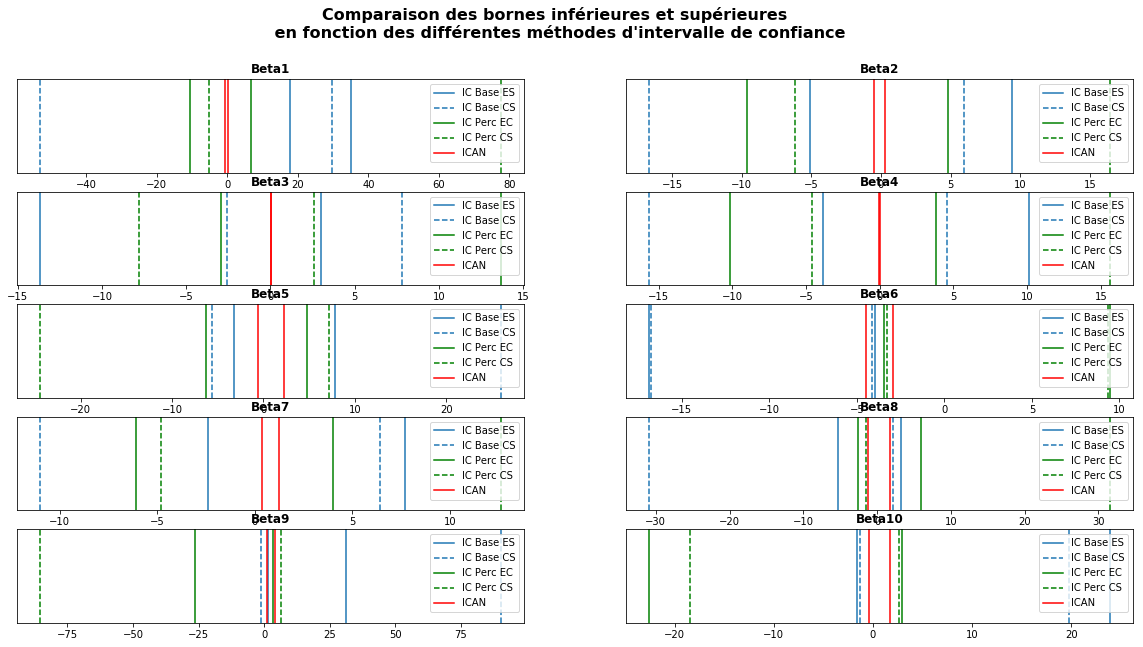

In [54]:
# A RAJOUTER: CASE SAMPLING AVEC DASH LINE
fig=plt.figure(figsize=(20,10))
plt.suptitle("Comparaison des bornes inférieures et supérieures \n en fonction des différentes méthodes d'intervalle de confiance",
           fontweight='bold',size=16)

IC_base_ES=IC_base(alpha,Beta_cars,Beta_ES)
IC_base_CS=IC_base(alpha,Beta_cars,beta_CS)
IC_perc_ES=IC_perc(alpha,Beta_cars,Beta_ES)
IC_perc_CS=IC_perc(alpha,Beta_cars,beta_CS)
ICAN_plot= ICAN(alpha,X_cars,Y_cars,y_pred_cars,Beta_cars)

for i in range(len(Beta_cars)-1):
    ax=fig.add_subplot(5,2,i+1)
    #base ES
    base_ES=ax.axvline(IC_base_ES[i-1][0] ,label="IC Base ES")
    base_ES=ax.axvline(IC_base_ES[i-1][1] ,label="IC Base ES")
    #base CS
    base_CS=ax.axvline(IC_base_CS[i-1][0] ,label="IC Base CS",linestyle='dashed')
    base_CS=ax.axvline(IC_base_CS[i-1][1] ,label="IC Base CS",linestyle='dashed')
    #percentile ES
    perc_ES=ax.axvline(IC_perc_ES[i-1][0] ,color='green',label="IC Perc EC")
    perc_ES=ax.axvline(IC_perc_ES[i-1][1] ,color='green',label="IC Perc EC")
    #percentile CS
    perc_CS=ax.axvline(IC_perc_CS[i-1][0] ,color='green',label="IC Perc CS",linestyle='dashed')
    perc_CS=ax.axvline(IC_perc_CS[i-1][1] ,color='green',label="IC Perc CS",linestyle='dashed')
    #ICAN
    ican=ax.axvline(ICAN_plot[i-1][0],color='red',label="ICAN")
    ican=ax.axvline(ICAN_plot[i-1][1],color='red',label="ICAN")
    plt.title("Beta"+str(i+1),fontweight='bold')
    plt.yticks([])
    plt.legend(handles=[base_ES,base_CS,perc_ES,perc_CS,ican])

plt.show()

On constate que l'intervalle de confiance Asymptotique Normal semble très souvent plus performant que les IC Percentile et basique. La différence de performance entre les modèles error sampling et Case sampling sont relativement différente en fonction du paramètre choisis de même entre les IC percentile et basique

Comparons à présent la même chose pour le dataset urine :

[-10.350878633716924, 12.273007141609696]
[-0.49369772481842766, -0.26757132464459643]
[0.02349205460339506, 0.024183960840867262]
[-0.46349635594449023, -0.44276653174635117]
[-0.025635507915316276, -0.02438766582786856]


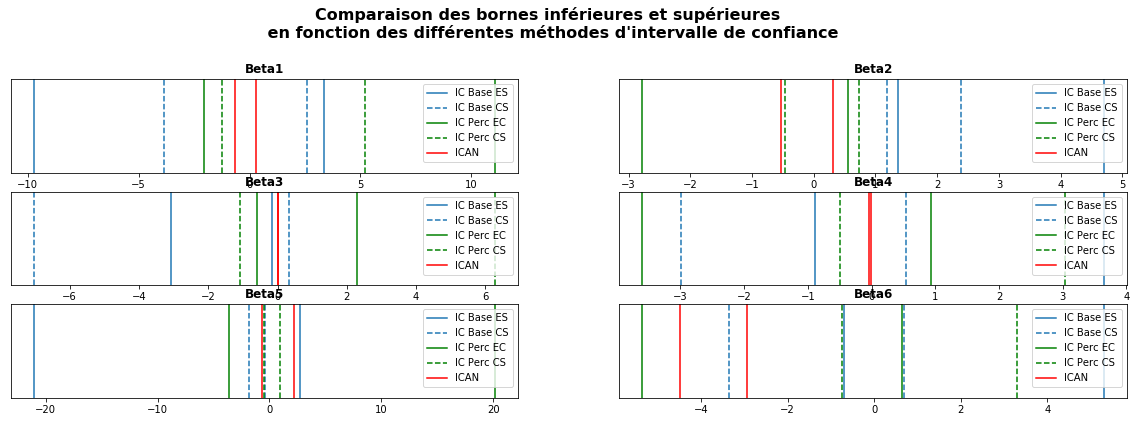

In [56]:
# A RAJOUTER: CASE SAMPLING AVEC DASH LINE
fig=plt.figure(figsize=(20,10))
plt.suptitle("Comparaison des bornes inférieures et supérieures \n en fonction des différentes méthodes d'intervalle de confiance",
           fontweight='bold',size=16)

IC_base_ES=IC_base(alpha,Beta_urine,Beta_ESU)
IC_base_CS=IC_base(alpha,Beta_urine,Beta_CSU)
IC_perc_ES=IC_perc(alpha,Beta_urine,Beta_ESU)
IC_perc_CS=IC_perc(alpha,Beta_urine,Beta_CSU)
ICAN(alpha,X_urine,Y_urine,y_pred_urine,Beta_urine)

for i in range(len(Beta_urine)):
    ax=fig.add_subplot(5,2,i+1)
    #base ES
    base_ES=ax.axvline(IC_base_ES[i-1][0] ,label="IC Base ES")
    base_ES=ax.axvline(IC_base_ES[i-1][1] ,label="IC Base ES")
    #base CS
    base_CS=ax.axvline(IC_base_CS[i-1][0] ,label="IC Base CS",linestyle='dashed')
    base_CS=ax.axvline(IC_base_CS[i-1][1] ,label="IC Base CS",linestyle='dashed')
    #percentile ES
    perc_ES=ax.axvline(IC_perc_ES[i-1][0] ,color='green',label="IC Perc EC")
    perc_ES=ax.axvline(IC_perc_ES[i-1][1] ,color='green',label="IC Perc EC")
    #percentile CS
    perc_CS=ax.axvline(IC_perc_CS[i-1][0] ,color='green',label="IC Perc CS",linestyle='dashed')
    perc_CS=ax.axvline(IC_perc_CS[i-1][1] ,color='green',label="IC Perc CS",linestyle='dashed')
    #ICAN
    ican=ax.axvline(ICAN_plot[i-1][0],color='red',label="ICAN")
    ican=ax.axvline(ICAN_plot[i-1][1],color='red',label="ICAN")
    plt.title("Beta"+str(i+1),fontweight='bold')
    plt.yticks([])
    plt.legend(handles=[base_ES,base_CS,perc_ES,perc_CS,ican])

plt.show()

Ici on constate que les différents intervalles de confiance  "s'entrecoupent moins" que dans le cas précédent. Encore une fois, les intervalles asymptotique normales semblent globalement plus ressérés. Enfin, la différence de performance Percentile/Basique Error Sampling/Case sampling varie d'un paramètre à l'autre

## Tests par Bootstrap

In [150]:
# Cette fonction permet de réaliser une régression linéaire ou logistique sur l'un des deux datasets (variable choice)
# En ayant préalablement retiré la colonne d'indice k (dans le but de faire un test de nullité)
# Elle retourne les nouvelles estimations de Beta ainsi que les résidus associés
# ETAPE 1
def Estim_ES(data,choice,k):
    list_y_sample=list()
    Beta_ES=list()
    res_ES=list()
    if choice=="cars":
        if k==2:
            df=data.drop(data.columns[k],1)
            X=np.array(df.iloc[:,3:df.shape[1]])
            Y=np.array(df.iloc[:,1])
            model=st.families.Gaussian()
            Reg_lin = st.GLM(Y,X,model)
            results = Reg_lin.fit()
            Beta=results.params
            resid=results.resid_deviance
            vraise=0
        else:
            df=data.drop(data.columns[k],1)
            X=np.array(df.iloc[:,2:df.shape[1]])
            Y=np.array(df.iloc[:,1])
            model=st.families.Gaussian()
            Reg_lin = st.GLM(Y,X,model)
            results = Reg_lin.fit()
            Beta=results.params
            resid=results.resid_deviance
            vraise=0
    if choice=="urine":
        if k==1:
            df=data.drop(data.columns[k],1)
            X=np.array(data.iloc[:,2:data.shape[1]])
            Y=np.array(data.iloc[:,0])
            model=st.families.Binomial()
            Reg_lin = st.GLM(Y,X,model)
            results = Reg_lin.fit()
            Beta=results.params
            vraise=results.llf
            resid=results.resid_pearson
        else:
            df=data.drop(data.columns[k],1)
            X=np.array(data.iloc[:,1:data.shape[1]])
            Y=np.array(data.iloc[:,0])
            model=st.families.Binomial()
            Reg_lin = st.GLM(Y,X,model)
            results = Reg_lin.fit()
            Beta=results.params
            resid=results.resid_pearson
            vraise=results.llf
    return(Beta,resid,X,vraise)

In [83]:
def Fisher(X,X_sub,Y,gamma,beta):
    n=X.shape[0]
    p=X.shape[1]-1
    norm_h0=np.linalg.norm(Y-np.dot(X_sub,gamma))**2
    norm_h1=np.linalg.norm(Y-np.dot(X,beta))**2      
    return( (n-p)*(norm_h0-norm_h1)/norm_h1 )

In [99]:
def p_value(F_stat,F_obs):
    return( np.sum( [1 for b in range(len(F_stat)) if F_stat[b] > F_obs] )/len(F_stat) )

### Dataset cars

#### Error Sampling

In [184]:
# ETAPE 1
gamma,Residus,X_H0,vrais = Estim_ES(cars,"cars",7)
# Etape 2
Sample_Result=[]
Ind=[]
for b in range(B):
        ind=npr.randint(0,len(Residus),len(Residus))
        Ind.append(ind)
        sample_res=[]
        for k in ind:
            sample_res.append(Residus[k])
        Sample_Result.append(sample_res)   
Sample_Result       

[[-0.8191218798284723,
  0.7577227789408454,
  -0.055547448086901596,
  1.912642398537196,
  -0.6346712744538827,
  -0.8724935164318346,
  1.7223797514599148,
  -1.7122488786984391,
  -0.8724935164318346,
  -0.8724935164318346,
  1.279713600175267,
  2.593477406183677,
  3.8618108457565334,
  1.3914324904459754,
  -2.309914901248696,
  -3.5494766848203767,
  1.3914324904459754,
  -2.913944911377481,
  -2.410745639939261,
  1.9089514414933504,
  3.8618108457565334,
  -0.8191218798284723,
  1.9089514414933504,
  -0.2324009026614462,
  2.1293438840412335,
  5.248317765209464,
  -1.635388125196684,
  -0.2353881251966854,
  2.593477406183677,
  -0.5784097615116419,
  0.7577227789408454,
  -0.055547448086901596],
 [-1.5447252986489488,
  1.279713600175267,
  -2.410745639939261,
  1.279713600175267,
  1.912642398537196,
  -0.8724935164318346,
  -1.7122488786984391,
  -1.7122488786984391,
  -1.5447252986489488,
  2.1293438840412335,
  3.8618108457565334,
  -0.2353881251966854,
  3.861810845756

In [185]:
# Etape 3 et 4
var_cars=(1/(len(cars)-X_H0.shape[1]-1))*sum(Residus**2)
list_y_sampleH0=[]
Gamma_ES=[]
Fisher_ES=[]
for b in range(B):
    y_cars_hat=np.zeros(len(cars))
    
    for i in range(len(cars)):
        y_cars_hat[i] = np.dot(X_H0[i,:],gamma) + np.sqrt(var_cars)*Sample_Result[b][i]
    list_y_sampleH0.append(y_cars_hat)
    #calcule des Beta et variances avec une regression linéaire sur l'échantillon bootstrapé
    lin_model_cars_sample =st.GLM(y_cars_hat,X_H0,st.families.Gaussian())
    lin_cars_res_sample = lin_model_cars_sample.fit()
    beta_cars_sample = lin_cars_res_sample.params
    sd_sample=np.std(resid_cars_sample)
    #sauvegarde dans une liste les beta's et erreurs estimés
    Gamma_ES.append(beta_cars_sample)
    X_sub=X_H0[ Ind[b],: ]
    Y_sub=Y_cars[Ind[b]]
    Fisher_ES.append(Fisher(X_cars,X_sub,Y_sub,beta_cars_sample,Beta_cars))


In [186]:
p_value(Fisher_ES,Fisher(X_cars,X_H0,Y_cars,gamma,Beta_cars))

0.0

#### Case Sampling

In [198]:
# ETAPE 1
k=4
Fisher_CS=[]
df=cars.drop(cars.columns[k],1)
X_cars_CSH0=np.array(df.iloc[:,3:df.shape[1]])
Y_cars_CSH0=np.array(df.iloc[:,1])
lin_model_cars_tot=st.GLM(Y_cars_CSH0,X_cars_CSH0,st.families.Gaussian())
lin_cars_res_tot = lin_model_cars_tot.fit()
Beta_cars_tot=lin_cars_res_tot.params

for b in range(1,B):
    ind= np.random.randint(0,len(cars),len(cars))
    sample_X=X_cars_CSH0[ind,:]
    sample_Y=Y_cars_CSH0[ind]
    lin_model_cars_CSH0 =st.GLM(sample_Y,sample_X,st.families.Gaussian())
    lin_cars_res_CSH0 = lin_model_cars_CSH0.fit()
    beta_cars_CSH0=lin_cars_res_CSH0.params
    Fisher_CS.append(Fisher(X_cars_CSH0,sample_X,sample_Y,beta_cars_CSH0,Beta_cars_tot))   

In [199]:
p_value(Fisher_CS,Fisher(X_cars,X_cars_CSH0,Y_cars,Beta_cars_tot,Beta_cars))

0.0

### Dataset Urine

#### Error sampling

In [180]:
# ETAPE 1 et 2
gamma_U,Residus_U,X_H0U,vraise_U = Estim_ES(urine,"urine",4)
# Etape 2
Sample_Result_U=[]
for b in range(B):
        ind=npr.randint(0,len(Residus_U),len(Residus_U))
        sample_res=[]
        for k in ind:
            sample_res.append(Residus_U[k])
        Sample_Result_U.append(sample_res)   
Sample_Result_U

[[-1.5305482529705436,
  0.4092419055006443,
  -0.647832160250357,
  -0.3150716250870097,
  1.1118564766554935,
  0.6493106837313668,
  -0.2542607970696708,
  -0.5335557801234824,
  0.04062337656104647,
  -0.37548892932141675,
  1.1118564766554935,
  -0.30112817633476496,
  0.8790377602545815,
  -0.6421193666645707,
  -1.024333970317594,
  -0.4017860401307253,
  0.2154966424898913,
  -0.6561532700405677,
  -1.1290384986781892,
  -0.3662880713998662,
  0.3511363092512816,
  -0.2542607970696708,
  1.0314797936416304,
  1.406289222112207,
  -1.4010353358022192,
  0.4092419055006443,
  0.3510015827977064,
  -0.31188908721529524,
  1.4023804110539402,
  -0.9432457132264331,
  -0.25591010472279024,
  0.8790377602545815,
  0.011850315421009313,
  0.3510015827977064,
  0.7917920530765324,
  -0.409925128171024,
  -0.6561532700405677,
  -0.6421193666645707,
  -0.5051075277175676,
  -0.9088803702594244,
  -0.2833312641928211,
  -0.4780686751584619,
  -0.2542607970696708,
  -0.2542607970696708,
  

In [181]:
# Etape 3 et 4
var_cars=(1/(len(urine)-X_H0U.shape[1]-1))*sum(Residus_U**2)
list_y_sampleH0U=[]
Gamma_ESU=[]
Fisher_ESU=[]
list_vraise=[]
for b in range(B):
    y_urine_hat=np.zeros(len(urine))
    for i in range(len(urine)):
        Pi=(np.exp(np.dot(X_H0U[i,:],gamma_U))/(1+np.exp(np.dot(X_H0U[i,:],gamma_U))))
        calc = Pi + np.sqrt(Pi*(1-Pi))*Sample_Result_U[b][i]
        if calc>0.5:
             y_urine_hat[i] = 1
        else:
            y_urine_hat[i]=0
    list_y_sampleH0U.append(y_urine_hat)
    #calcule des Beta et variances avec une regression linéaire sur l'échantillon bootstrapé
    lin_model_urine_sample =st.GLM(y_urine_hat,X_H0U,st.families.Binomial())
    
    lin_urine_res_sample = lin_model_urine_sample.fit()
    beta_urine_sample = lin_urine_res_sample.params
    #sauvegarde dans une liste les beta's et erreurs estimés
    list_vraise.append(-2*(lin_urine_res_sample.llf-urine_results.llf))
list_vraise

[-12.013530193050187,
 -19.206540709764546,
 -24.960683934494043,
 5.092357528790288,
 -7.548756083849931,
 -11.766372074571578,
 -4.168242237953621,
 -19.314200920210965,
 -20.69669577913254,
 -11.848400947504189,
 -11.973832834102467,
 -14.712975025281196,
 -16.416893934122953,
 -1.9748495648340167,
 2.276294851871043,
 0.0826752282989105,
 -13.727155224322992,
 -23.60641958959495,
 -20.749744994593655,
 -11.85220924064501,
 -8.790458025882288,
 -23.40159654385843,
 -23.226779565885373,
 -15.727515128665914,
 -14.863999190340756,
 -30.452441801683648,
 -12.919087016029124,
 -2.426799905680255,
 -8.389716777779142,
 -1.962542723503418,
 -9.176055420263154,
 -5.8897179193147196,
 -44.67295464582823,
 -26.794538744425083,
 -12.82637424589246,
 -20.361888370830684,
 -21.427779356851488,
 -19.874457701404182,
 -23.156225510879196,
 -3.0280098967791815,
 -11.821944095374263,
 -4.711614340132186,
 -12.240457322871478,
 -17.05999807832677,
 -15.698610099736257,
 -6.579931859821926,
 -18.4295

In [182]:
p_value(list_vraise,-2*(vraise_U-urine_results.llf))

0.0745

#### Case sampling

In [235]:
gamma_U,Residus_U,X_H0U,vraise_CSU = Estim_ES(urine,"urine",3)
k=3 # On supprime la colonne 2
vraise_CS=[]
dfu=urine.drop(urine.columns[k],1)
X_urine_CSH0=np.array(dfu.iloc[:,3:dfu.shape[1]])
Y_urine_CSH0=np.array(dfu.iloc[:,0])
lin_model_urine_tot=st.GLM(Y_urine_CSH0,X_urine_CSH0,st.families.Binomial())
lin_urine_res_tot = lin_model_urine_tot.fit()
Beta_urine_tot=lin_urine_res_tot.params

for b in range(1,B):
    ind= np.random.randint(0,len(urine),len(urine))
    sample_XU=X_urine_CSH0[ind,:]
    sample_YU=Y_urine_CSH0[ind]
    lin_model_urine_CSH0 =st.GLM(sample_YU,sample_XU,st.families.Binomial())
    lin_urine_res_CSH0 = lin_model_urine_CSH0.fit()
    #print(lin_urine_res_CSH0.llf)
    vraise_CS.append(-2*(lin_urine_res_CSH0.llf-vraise_CSU))   
vraise_CS

[2.6115116994270977,
 15.543985538450642,
 12.106648179357165,
 -0.025171553592329587,
 4.105519893926143,
 -3.331571434442907,
 -0.9469384272151586,
 10.115473590241862,
 5.129797141031332,
 6.106270601437558,
 2.8697095765680416,
 3.7999190725589784,
 2.431360441461621,
 2.6129640131581624,
 7.30685718981799,
 12.516159469549507,
 0.7604492052560943,
 10.95504921550129,
 -4.3077376818666835,
 11.779140877326313,
 4.45101739630897,
 4.7904835629078235,
 10.21496269804031,
 21.51246085447245,
 17.225241352011793,
 5.9930209055385575,
 -7.864587756832606,
 6.397264695336943,
 12.897388891944104,
 16.152071376764653,
 14.635697329807627,
 1.2131488443655911,
 -12.88807232593588,
 4.637989243155786,
 11.039563750807446,
 17.629084972710274,
 -1.3039993801909588,
 16.96323367240626,
 22.21588604070641,
 13.424727417990269,
 -27.89205020968356,
 1.5000701623031745,
 21.98985555926889,
 -2.134933663456053,
 9.072923979418917,
 8.644861538523287,
 13.972192573667414,
 4.834743253438091,
 4.20

In [236]:
p_value(vraise_CS,-2*(vraise_CSU-urine_results.llf))

0.8194097048524263

In [233]:
vraise_CSU,urine_results.llf

(-34.460727808819705, -34.460727808819705)

In [229]:
-2*(vraise_CSU-urine_results.llf)

-0.0

## Sur simulations

In [53]:
# Définition des paramètres et des échantillons
n=50
p=5
beta_0=2
beta_1=2
beta_2=2
beta_3=0
beta_4=0
beta_5=0

X=np.zeros((n,p))
for k in range(n):
    for j in range(p):
        X[k][j]=npr.uniform(-0.5,0.5)
Y=np.zeros((n,1))
for k in range(n):
    Y[k]=beta_0+beta_1*X[k][0]+beta_2*X[k][1]+beta_3*X[k][2]+beta_4*X[k][3]+beta_5*beta_1*X[k][4]+npr.normal(0,1)